In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
from spin_package.ising_fixed_T import compute_Tk, compute_Td, compute_q_standard, compute_free_energy_standard

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test $T_k$

In [33]:
p = 3
Tk = compute_Tk(p)

In [37]:
ms = np.linspace(0.0001, 0.9999, 500)
Ts = np.linspace(Tk * 0.98, Tk * 1.02, 5)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))
blend = 0.25

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new

        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p, 1 / T, J0)

  0%|          | 0/5 [00:00<?, ?it/s]

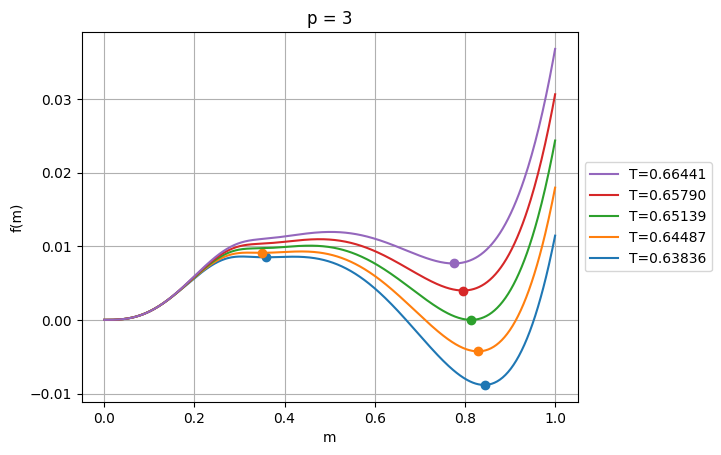

In [38]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
# plt.xlim(0.95, 1.0)
# plt.ylim(-0.005, 0.005)

## Test $T_d$

In [25]:
p = 10
Td = compute_Td(p)
print(f"Td = {Td:.8f}")

Td = 0.83828983


In [26]:
ms = np.linspace(0.001, 0.999, 5_000)
blend = 0.25

Ts = np.linspace(Td * 0.99, Td * 1.01, 7)
qs = np.empty((len(Ts), len(ms)))
hs = np.empty((len(Ts), len(ms)))
deltafs = np.empty((len(Ts), len(ms)))
fs = np.empty((len(Ts), len(ms)))

for jdx, T in enumerate(tqdm(Ts)):
    J0 = 1 / (2 * T)
    q_init = 0.8
    for idx, m in enumerate(ms):
        err = 1
        q = q_init
        while err > 1e-7:
            q_new = compute_q_standard(m, q, p, 1 / T, J0)

            err = abs(q_new - q)
            q = blend * q + (1 - blend) * q_new
            
        q_init = q

        qs[jdx, idx] = q
        fs[jdx, idx] = compute_free_energy_standard(m, q, p, 1 / T, J0)

  0%|          | 0/7 [00:00<?, ?it/s]

(0.25, 0.3)

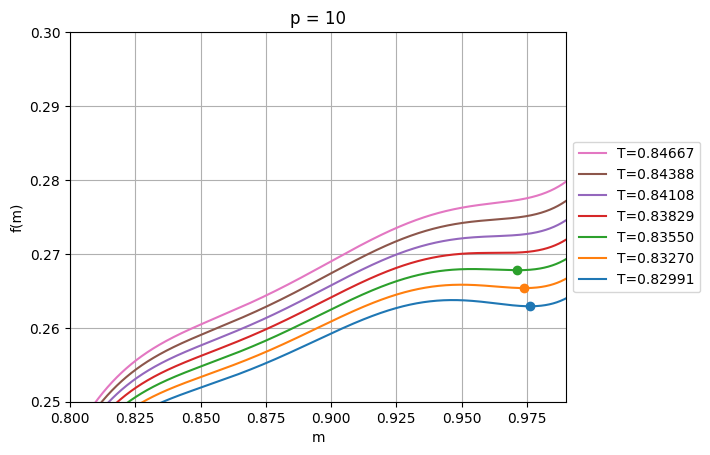

In [30]:
for idx, T in enumerate(Ts):
    plt.plot(ms, fs[idx, :] - fs[idx, 0], label=f"T={T:.5f}")
    peaks, _ = find_peaks(-(fs[idx, :] - fs[idx, 0]))
    plt.plot(
        ms[peaks],
        fs[idx, peaks] - fs[idx, 0],
        "o",
        color=plt.gca().lines[-1].get_color(),
    )

plt.title(f"p = {p:d}")
plt.xlabel("m")
plt.grid()
plt.ylabel("f(m)")

handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort(-fs[:, -1])
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.xlim(0.8,0.99)
plt.ylim(0.25, 0.3)

## $\{T_d, T_k\}$ vs $p$

In [45]:
ps = np.arange(3, 300)
Tds = np.empty(len(ps))
Tks = np.empty(len(ps))

T_init = 0.6
for idx, p in enumerate(tqdm(ps)):
    if idx > 0:
        T_init = Tds[idx - 1]
    Tds[idx] = compute_Td(p, T_init=T_init)
    Tks[idx] = compute_Tk(p)

  0%|          | 0/297 [00:00<?, ?it/s]

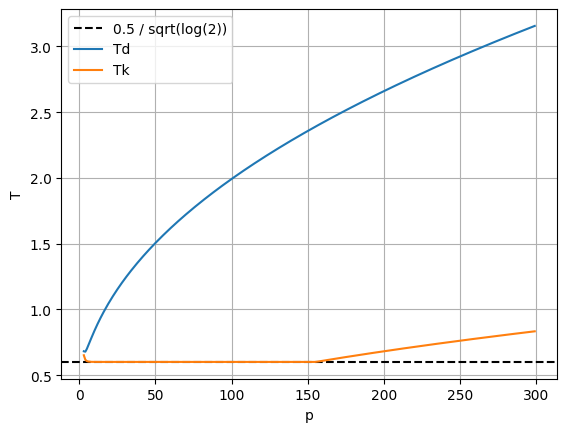

In [46]:
plt.axhline(0.5 / np.sqrt(np.log(2)), color="k", linestyle="--", label="0.5 / sqrt(log(2))")
plt.plot(ps, Tds, label="Td")
plt.plot(ps, Tks, label="Tk")

plt.xlabel("p")
plt.ylabel("T")
plt.grid()
plt.legend()